In [1]:
import pandas as pd
import seaborn as sns

In [2]:
mynorm = pd.read_table("../data/raw/methylation/GSE184269_Matrix_processed_FINAL.txt/GSE184269_Matrix_processed_FINAL.txt", index_col=0)
mynorm

,200607130085_R05C01,Detection_Pval,200607130085_R06C01,Detection_Pval.1,200607130085_R07C01,Detection_Pval.2,200607130085_R08C01,Detection_Pval.3,200607130086_R01C01,Detection_Pval.4,...,200607130035_R05C01,Detection_Pval.162,200607130035_R07C01,Detection_Pval.163,200607140055_R01C01,Detection_Pval.164,200607140055_R02C01,Detection_Pval.165,200607140055_R03C01,Detection_Pval.166
ID_RED,,,,,,,,,,,,,,,,,,,,,
cg18478105,0.014710,0.000000e+00,0.019144,0.000000e+00,0.017065,0.0,0.020694,0.000000e+00,0.027314,0.000000e+00,...,0.020963,0.000000e+00,0.029610,0.000000e+00,0.018874,0.000000e+00,0.021177,0.000000e+00,0.018149,0.000000e+00
cg09835024,0.045116,0.000000e+00,0.051199,0.000000e+00,0.105793,0.0,0.041223,0.000000e+00,0.060440,0.000000e+00,...,0.063234,0.000000e+00,0.060424,0.000000e+00,0.054325,0.000000e+00,0.035978,0.000000e+00,0.056682,0.000000e+00
cg14361672,0.859342,0.000000e+00,0.846802,0.000000e+00,0.874472,0.0,0.846390,0.000000e+00,0.862258,0.000000e+00,...,0.906060,0.000000e+00,0.929397,0.000000e+00,0.904678,0.000000e+00,0.877371,0.000000e+00,0.907877,0.000000e+00
cg01763666,0.812423,0.000000e+00,0.880717,0.000000e+00,0.763923,0.0,0.816708,0.000000e+00,0.810753,0.000000e+00,...,0.607667,0.000000e+00,0.911336,0.000000e+00,0.840613,0.000000e+00,0.700193,0.000000e+00,0.833069,0.000000e+00
cg12950382,0.892587,9.431352e-109,0.948803,9.289198e-285,0.956700,0.0,0.901654,4.763978e-202,0.979027,2.617455e-201,...,0.671951,1.132001e-32,0.815272,1.325488e-37,0.919852,1.588860e-41,0.862659,4.749669e-63,0.908845,2.116832e-158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg23079522,0.896183,0.000000e+00,0.903518,0.000000e+00,0.920900,0.0,0.906091,0.000000e+00,0.878561,0.000000e+00,...,0.892086,2.706633e-155,0.862585,6.537628e-246,0.840358,0.000000e+00,0.855578,5.527634e-263,0.882617,6.796225e-268
cg16818145,0.874829,0.000000e+00,0.881056,0.000000e+00,0.892562,0.0,0.876918,0.000000e+00,0.851614,0.000000e+00,...,0.914771,0.000000e+00,0.900595,0.000000e+00,0.880084,0.000000e+00,0.874567,0.000000e+00,0.874240,0.000000e+00
cg14585103,0.828799,0.000000e+00,0.795951,0.000000e+00,0.844756,0.0,0.822573,0.000000e+00,0.781307,0.000000e+00,...,0.855605,0.000000e+00,0.840986,0.000000e+00,0.836403,0.000000e+00,0.825114,0.000000e+00,0.807255,0.000000e+00


In [3]:
to_drop = mynorm[[name for name in mynorm.columns if "Pval" in name]]
to_drop = (to_drop > 0.01).astype(int).sum(axis=1)
to_drop = to_drop[to_drop > 1]
to_drop

ID_RED
cg08795713    10
cg19453472    14
cg27263894     5
cg14863074     2
cg06637938     2
              ..
cg04873061     2
cg27359472    13
cg19768229     8
cg08855551     2
cg16040564     5
Length: 22352, dtype: int64

In [4]:
mynorm = mynorm.drop(to_drop.index)
mynorm = mynorm[[name for name in mynorm.columns if not "Pval" in name]]
mynorm

,200607130085_R05C01,200607130085_R06C01,200607130085_R07C01,200607130085_R08C01,200607130086_R01C01,200607130067_R01C01,200607130067_R02C01,200607130067_R03C01,200607130067_R04C01,200607130067_R05C01,...,200607130075_R05C01,200607130075_R06C01,200607130075_R07C01,200607130075_R08C01,200607130035_R02C01,200607130035_R05C01,200607130035_R07C01,200607140055_R01C01,200607140055_R02C01,200607140055_R03C01
ID_RED,,,,,,,,,,,,,,,,,,,,,
cg18478105,0.014710,0.019144,0.017065,0.020694,0.027314,0.031201,0.025401,0.018158,0.015277,0.029535,...,0.031179,0.025697,0.031706,0.022856,0.031330,0.020963,0.029610,0.018874,0.021177,0.018149
cg09835024,0.045116,0.051199,0.105793,0.041223,0.060440,0.055218,0.068106,0.050415,0.050602,0.088296,...,0.066162,0.062697,0.085788,0.077730,0.079050,0.063234,0.060424,0.054325,0.035978,0.056682
cg14361672,0.859342,0.846802,0.874472,0.846390,0.862258,0.835499,0.864745,0.863910,0.852928,0.843564,...,0.944627,0.908850,0.935670,0.904160,0.915448,0.906060,0.929397,0.904678,0.877371,0.907877
cg01763666,0.812423,0.880717,0.763923,0.816708,0.810753,0.854875,0.787671,0.808117,0.887271,0.834825,...,0.922134,0.914116,0.845978,0.780120,0.663601,0.607667,0.911336,0.840613,0.700193,0.833069
cg12950382,0.892587,0.948803,0.956700,0.901654,0.979027,0.885614,0.796508,0.867460,0.934370,0.887732,...,0.849846,0.881300,0.838983,0.817514,0.896161,0.671951,0.815272,0.919852,0.862659,0.908845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg23079522,0.896183,0.903518,0.920900,0.906091,0.878561,0.865392,0.864324,0.858285,0.878220,0.896104,...,0.900354,0.885624,0.818563,0.888363,0.839230,0.892086,0.862585,0.840358,0.855578,0.882617
cg16818145,0.874829,0.881056,0.892562,0.876918,0.851614,0.852441,0.853963,0.880589,0.890177,0.887661,...,0.905657,0.904302,0.902146,0.905517,0.893736,0.914771,0.900595,0.880084,0.874567,0.874240
cg14585103,0.828799,0.795951,0.844756,0.822573,0.781307,0.786362,0.815316,0.799664,0.826192,0.816172,...,0.859002,0.836958,0.813538,0.812035,0.851604,0.855605,0.840986,0.836403,0.825114,0.807255


<Axes: ylabel='Density'>

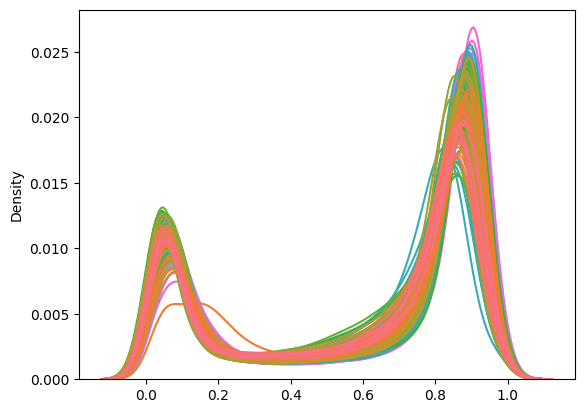

In [5]:
sns.kdeplot(mynorm.sample(50000), legend=False)

In [6]:
mapper = pd.read_csv("../data/methylation_sample_sheet.csv", index_col=0)
mapper = dict(zip(mapper.key, mapper["sample"]))
mynorm.columns = mynorm.columns.map(mapper)
mynorm

,whole_blood_GT001,whole_blood_GT002,whole_blood_GT003,whole_blood_GT004,whole_blood_GT005,whole_blood_GT007,whole_blood_GT011,whole_blood_GT013,whole_blood_GT014,whole_blood_GT015,...,naive_B_GT014,monocytes_GT014,NK_GT014,peripheral_blood_GT015,naive_CD4_GT015,naive_CD8_GT015,naive_B_GT015,monocytes_GT015,NK_GT015,peripheral_blood_GT016
ID_RED,,,,,,,,,,,,,,,,,,,,,
cg18478105,0.014710,0.019144,0.017065,0.020694,0.027314,0.031201,0.025401,0.018158,0.015277,0.029535,...,0.031179,0.025697,0.031706,0.022856,0.031330,0.020963,0.029610,0.018874,0.021177,0.018149
cg09835024,0.045116,0.051199,0.105793,0.041223,0.060440,0.055218,0.068106,0.050415,0.050602,0.088296,...,0.066162,0.062697,0.085788,0.077730,0.079050,0.063234,0.060424,0.054325,0.035978,0.056682
cg14361672,0.859342,0.846802,0.874472,0.846390,0.862258,0.835499,0.864745,0.863910,0.852928,0.843564,...,0.944627,0.908850,0.935670,0.904160,0.915448,0.906060,0.929397,0.904678,0.877371,0.907877
cg01763666,0.812423,0.880717,0.763923,0.816708,0.810753,0.854875,0.787671,0.808117,0.887271,0.834825,...,0.922134,0.914116,0.845978,0.780120,0.663601,0.607667,0.911336,0.840613,0.700193,0.833069
cg12950382,0.892587,0.948803,0.956700,0.901654,0.979027,0.885614,0.796508,0.867460,0.934370,0.887732,...,0.849846,0.881300,0.838983,0.817514,0.896161,0.671951,0.815272,0.919852,0.862659,0.908845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg23079522,0.896183,0.903518,0.920900,0.906091,0.878561,0.865392,0.864324,0.858285,0.878220,0.896104,...,0.900354,0.885624,0.818563,0.888363,0.839230,0.892086,0.862585,0.840358,0.855578,0.882617
cg16818145,0.874829,0.881056,0.892562,0.876918,0.851614,0.852441,0.853963,0.880589,0.890177,0.887661,...,0.905657,0.904302,0.902146,0.905517,0.893736,0.914771,0.900595,0.880084,0.874567,0.874240
cg14585103,0.828799,0.795951,0.844756,0.822573,0.781307,0.786362,0.815316,0.799664,0.826192,0.816172,...,0.859002,0.836958,0.813538,0.812035,0.851604,0.855605,0.840986,0.836403,0.825114,0.807255


In [7]:
mynorm = mynorm.dropna()
mynorm

,whole_blood_GT001,whole_blood_GT002,whole_blood_GT003,whole_blood_GT004,whole_blood_GT005,whole_blood_GT007,whole_blood_GT011,whole_blood_GT013,whole_blood_GT014,whole_blood_GT015,...,naive_B_GT014,monocytes_GT014,NK_GT014,peripheral_blood_GT015,naive_CD4_GT015,naive_CD8_GT015,naive_B_GT015,monocytes_GT015,NK_GT015,peripheral_blood_GT016
ID_RED,,,,,,,,,,,,,,,,,,,,,
cg18478105,0.014710,0.019144,0.017065,0.020694,0.027314,0.031201,0.025401,0.018158,0.015277,0.029535,...,0.031179,0.025697,0.031706,0.022856,0.031330,0.020963,0.029610,0.018874,0.021177,0.018149
cg09835024,0.045116,0.051199,0.105793,0.041223,0.060440,0.055218,0.068106,0.050415,0.050602,0.088296,...,0.066162,0.062697,0.085788,0.077730,0.079050,0.063234,0.060424,0.054325,0.035978,0.056682
cg14361672,0.859342,0.846802,0.874472,0.846390,0.862258,0.835499,0.864745,0.863910,0.852928,0.843564,...,0.944627,0.908850,0.935670,0.904160,0.915448,0.906060,0.929397,0.904678,0.877371,0.907877
cg01763666,0.812423,0.880717,0.763923,0.816708,0.810753,0.854875,0.787671,0.808117,0.887271,0.834825,...,0.922134,0.914116,0.845978,0.780120,0.663601,0.607667,0.911336,0.840613,0.700193,0.833069
cg12950382,0.892587,0.948803,0.956700,0.901654,0.979027,0.885614,0.796508,0.867460,0.934370,0.887732,...,0.849846,0.881300,0.838983,0.817514,0.896161,0.671951,0.815272,0.919852,0.862659,0.908845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg23079522,0.896183,0.903518,0.920900,0.906091,0.878561,0.865392,0.864324,0.858285,0.878220,0.896104,...,0.900354,0.885624,0.818563,0.888363,0.839230,0.892086,0.862585,0.840358,0.855578,0.882617
cg16818145,0.874829,0.881056,0.892562,0.876918,0.851614,0.852441,0.853963,0.880589,0.890177,0.887661,...,0.905657,0.904302,0.902146,0.905517,0.893736,0.914771,0.900595,0.880084,0.874567,0.874240
cg14585103,0.828799,0.795951,0.844756,0.822573,0.781307,0.786362,0.815316,0.799664,0.826192,0.816172,...,0.859002,0.836958,0.813538,0.812035,0.851604,0.855605,0.840986,0.836403,0.825114,0.807255


In [8]:
met_ss = pd.read_csv("../data/methylation_sample_sheet.csv", index_col=0)
common = set(met_ss["sample"]).intersection(set(mynorm.columns))
common = list(common)
len(common)

167

In [9]:
mynorm[common].to_parquet("../data/processed/methylation.parquet")